In [1]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, 
                    return_X_y=True, as_frame=False)

print("Shape of input : ", X.shape, "Shape of target : ", y.shape)


# Shape of input :  (70000, 784) Shape of target :  (70000,)

Shape of input :  (70000, 784) Shape of target :  (70000,)


Matplotlib created a temporary config/cache directory at /var/folders/w1/ddjn79r10gb30q27xq0t_fjw0000gn/T/matplotlib-i_7xpflk because the default path (/Users/ravishkumar/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


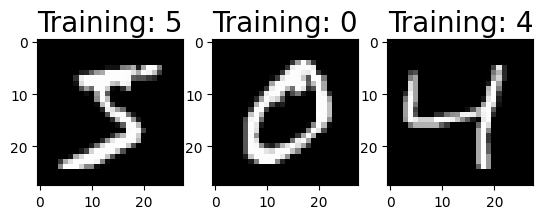

In [2]:
from matplotlib import pyplot as plt
import numpy as np

plt.figure()
for idx, image in enumerate(X[:3]):
    plt.subplot(1, 3, idx + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: ' + y[idx], fontsize = 20);

In [3]:
from sklearn.model_selection import train_test_split
y = [int(i) for i in y] # targets are strings, so need to convert to # int

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=1/7,random_state=0)
print("training samples shape = ", X_train.shape)
print("testing samples shape = ", X_test.shape)


## training samples shape =  (60000, 784)
## testing samples shape =  (10000, 784)

training samples shape =  (60000, 784)
testing samples shape =  (10000, 784)


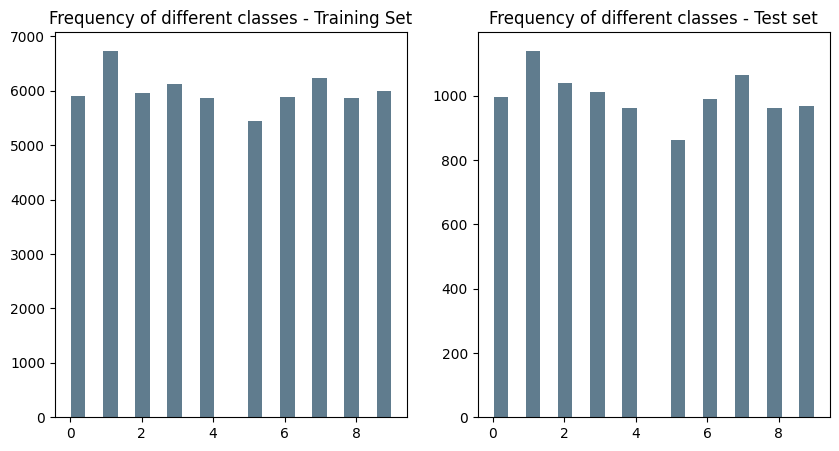

In [4]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(y_train, bins=20, rwidth=0.9, color='#607c8e');
plt.title('Frequency of different classes - Training Set');


plt.subplot(1,2,2)
plt.hist(y_test, bins=20, rwidth=0.9, color='#607c8e');
plt.title('Frequency of different classes - Test set');

In [5]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l1', #lasso regression
                        solver='saga',
                        max_iter=1000,
                        C=50,
                        verbose=2, # output progress
                        n_jobs=5, # parallelize over 5 processes
                        tol=0.01
                         )

model

# LogisticRegression(C=50, max_iter=1000, n_jobs=5, penalty='l1',   #       solver='saga', tol=0.01, verbose=2)


model.fit(X_train, y_train)

### convergence after 48 epochs took 131 seconds

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


convergence after 49 epochs took 91 seconds


[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:  1.5min finished


LogisticRegression(C=50, max_iter=1000, n_jobs=5, penalty='l1', solver='saga',
                   tol=0.01, verbose=2)

Training Accuracy =  93.758
Testing Accuracy =  91.94


Text(0.5, 192.72222222222217, 'Predicted label')

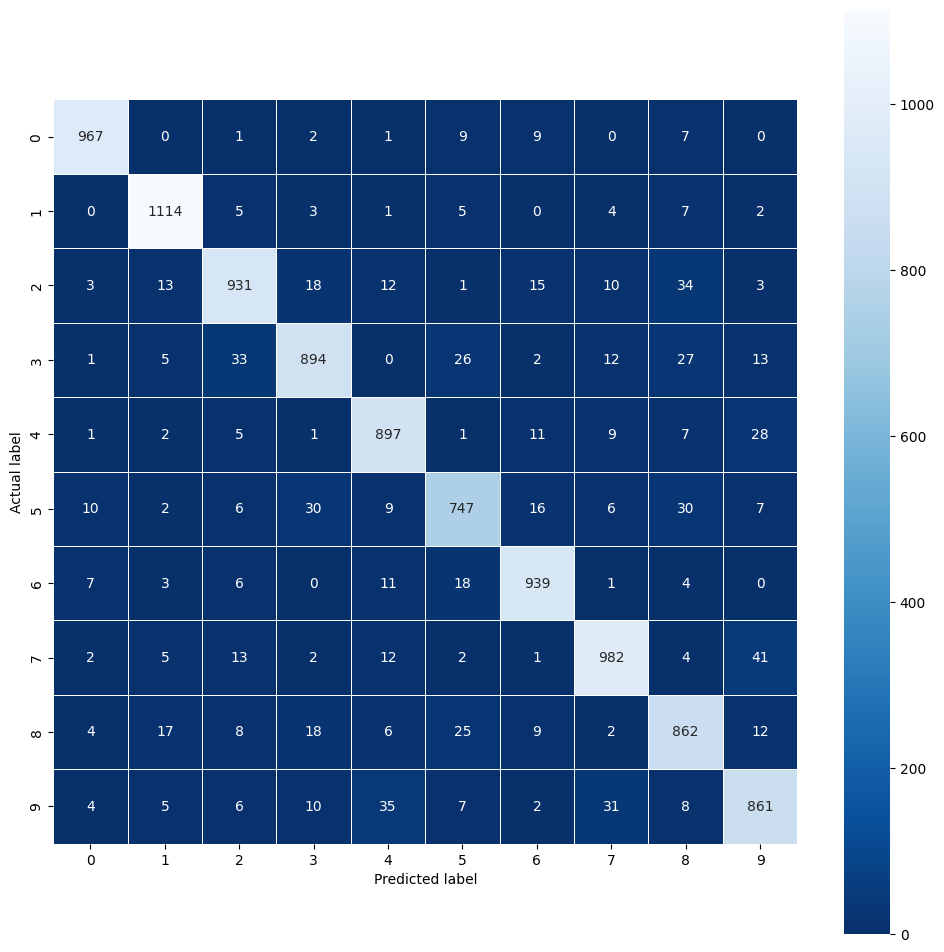

In [7]:
print("Training Accuracy = ", np.around(model.score(X_train,   y_train)*100,3))
print("Testing Accuracy = ", np.around(model.score(X_test, y_test)*100, 3))

## Training Accuracy =  93.742
## Testing Accuracy =  91.94

from sklearn import metrics
pred_y_test = model.predict(X_test)

cm = metrics.confusion_matrix(y_true=y_test, 
                         y_pred = pred_y_test, 
                        labels = model.classes_)
                        
# Let's see this Confusion matrix using seaborn libraray
import seaborn as sns
plt.figure(figsize=(12,12))

sns.heatmap(cm, annot=True, 
            linewidths=.5, square = True, cmap = 'Blues_r', fmt='0.4g');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [8]:
index = 0
misclassified_images = []
for label, predict in zip(y_test, pred_y_test):
    if label != predict: 
        misclassified_images.append(index)
    index +=1
    
    if len(misclassified_images) == 10:
        break
print("Ten Indexes are : ",misclassified_images)

Ten Indexes are :  [4, 5, 18, 61, 78, 82, 129, 134, 141, 161]


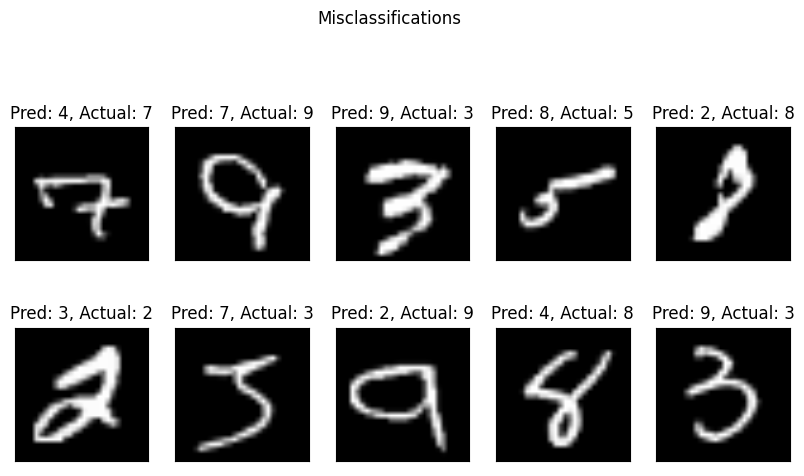

In [10]:
plt.figure(figsize=(10,10))
plt.suptitle('Misclassifications');

for plot_index, bad_index in enumerate(misclassified_images):
    
    p = plt.subplot(4,5, plot_index+1) # 4x5 plot
    
    p.imshow(X_test[bad_index].reshape(28,28), cmap=plt.cm.gray,
            interpolation='bilinear')
    p.set_xticks(()); p.set_yticks(()) # remove ticks
    
    p.set_title(f'Pred: {pred_y_test[bad_index]}, Actual: {y_test[bad_index]}');

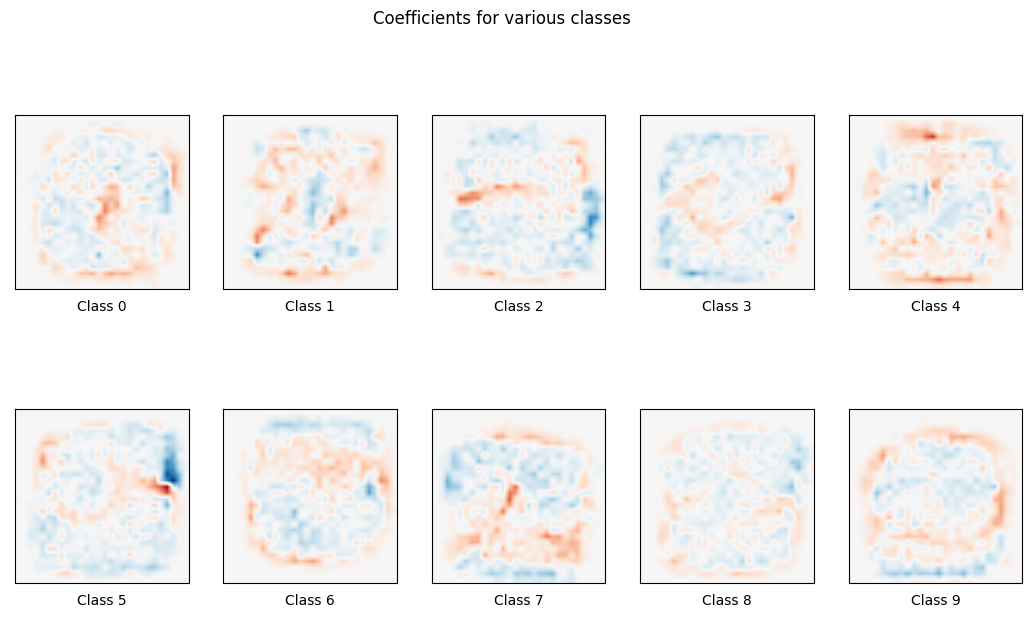

In [11]:
coef = model.coef_.copy()
scale = np.abs(coef).max()

plt.figure(figsize=(13,7))

for i in range(10): # 0-9
    coef_plot = plt.subplot(2, 5, i + 1) # 2x5 plot
    coef_plot.imshow(coef[i].reshape(28,28), 
                     cmap=plt.cm.RdBu,
                     vmin=-scale, vmax=scale,
                    interpolation='bilinear')
    
    coef_plot.set_xticks(()); coef_plot.set_yticks(()) # remove ticks
    coef_plot.set_xlabel(f'Class {i}')
    
plt.suptitle('Coefficients for various classes');